Прежде чем сдать это задание, убедитесь, что все работает должным образом. 
Для этого следует "выполнить всё" в документе.

Убедитесь, что вы заполнили все места, где написано «ВАШ КОД ЗДЕСЬ» или «ВАШ ОТВЕТ ЗДЕСЬ».

In [3]:
NAME = ""
COLLABORATORS = ""

#  Вводное задание. 

Вектора х1 и у1 из архива дают значения некоторой функции $f(x) .$ Постройте на графике, используя библиотечные функции:

(a) Интерполяционный Лагранжев многочлен.

(b) Интерполяционный кубический сплайн (CubicSpline).

(c) Монотонный кубический интерполянт (PchipInterpolator).

(d)  Аппроксимацию полиномами, используя функции np. polyfit и np.polyval. 

---

In [2]:
import numpy as np
df = np.load("C2_data_7_1.npz");
x1 = df["x1"]
y1 = df["y1"]

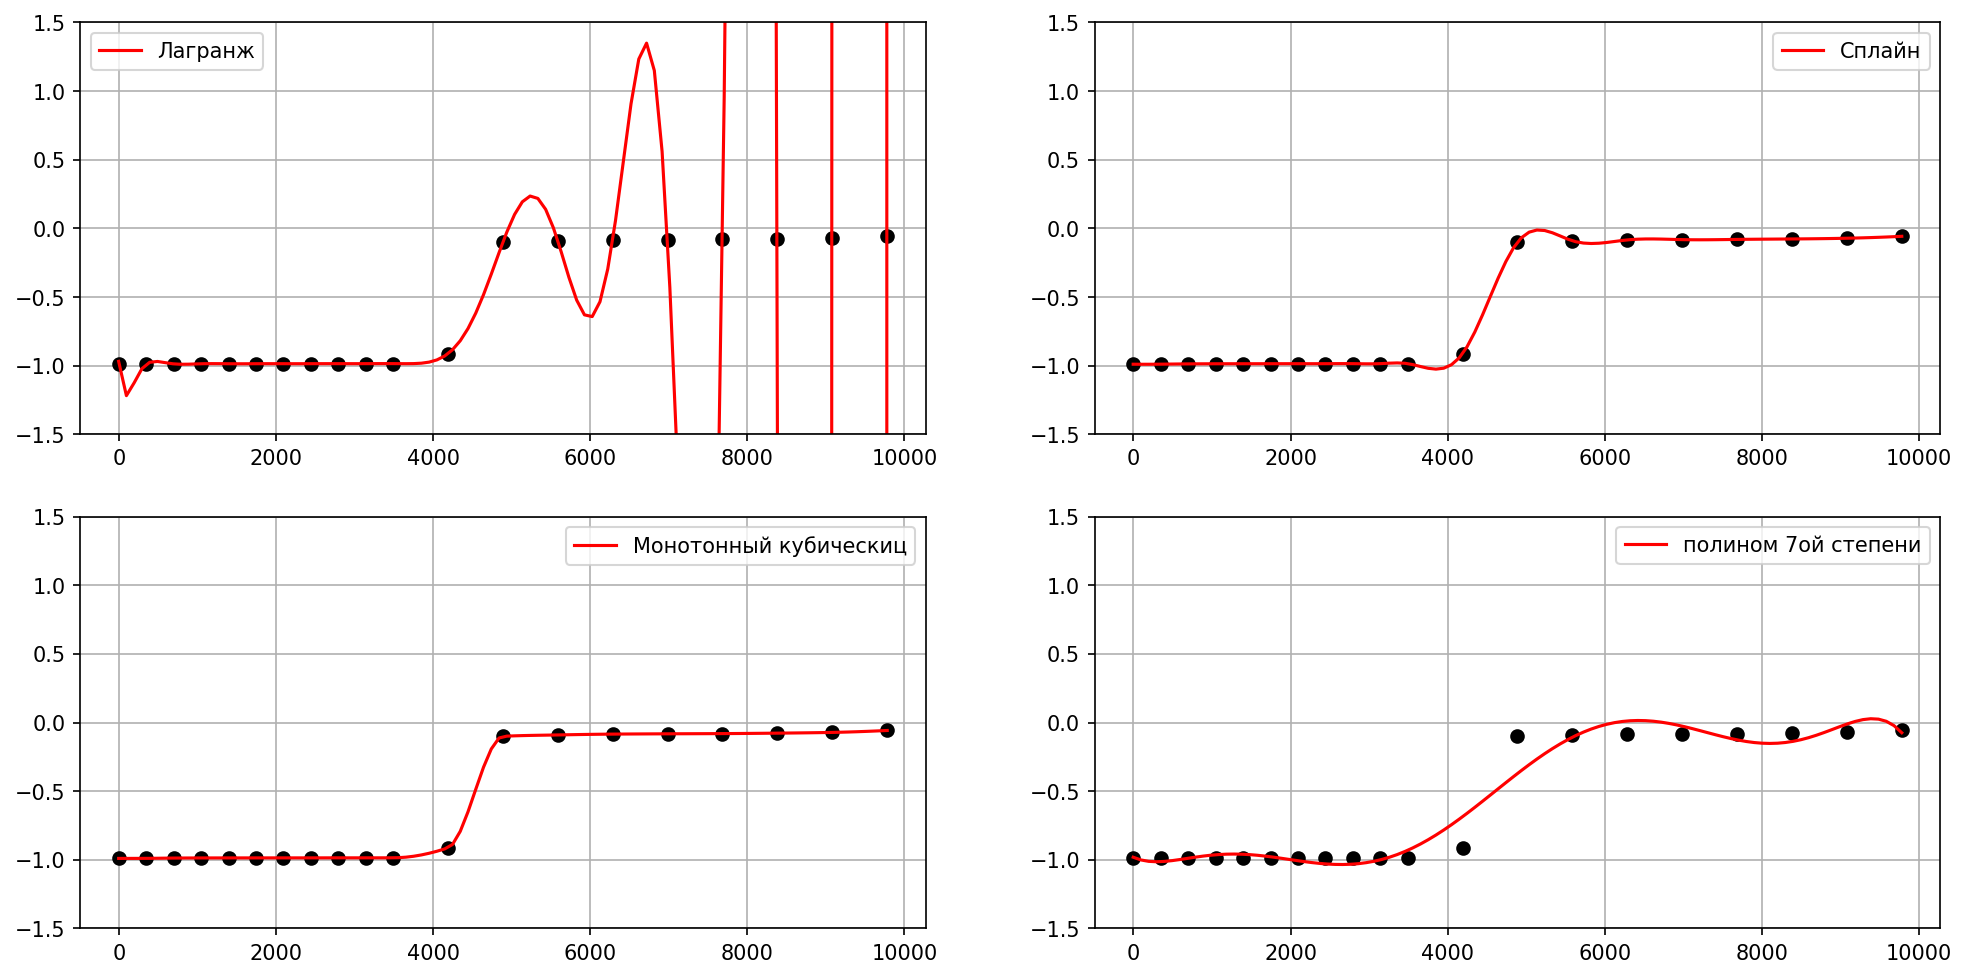

In [4]:

from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import PchipInterpolator
import matplotlib.pyplot as plt
Lag = lagrange(x1, y1)
Spl = CubicSpline(x1, y1)
Qub = PchipInterpolator(x1, y1)
Pol = np.polyfit(x1, y1, 7)

x0 = np.linspace(np.min(x1)-np.pi, np.max(x1)+np.pi, 100)
fig, axs = plt.subplots(2,2, figsize=(16, 8), dpi=150)
axs[0, 0].plot(x1, y1, 'o', color="k")
axs[0, 0].plot(x0, Lag(x0),"-",color="r", label="Лагранж")
axs[0, 1].plot(x1, y1, 'o', color="k")
axs[0, 1].plot(x0, Spl(x0), "-",color="r", label="Сплайн")
axs[1, 0].plot(x1, y1, 'o', color="k")
axs[1, 0].plot(x0, Qub(x0), "-",color="r",label="Монотонный кубическиц")
axs[1, 1].plot(x1, y1, 'o',  color="k")
axs[1, 1].plot(x0, np.polyval(Pol, x0),"-",color="r", label="полином 7ой степени")

for ax in axs.flatten():
    ax.set_ylim(-1.5, 1.5)
    ax.legend()
    ax.grid(0.25)

plt.show()

# Интерполяция полиномом Лагранжа.

Напишите класс, который конструирует интерполяционный полином Лагранжа, проходящий через точки, заданные как `xk` и `yk`.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import interpolate

In [6]:
class LagrangeInterpolator:
    
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        
        val = 0
        N = (self.xk).shape[0]
        for k in range(N):
            xs_k = np.hstack([self.xk[:k],self.xk[k+1:]]) # все x_i без x_k
            Xs = np.array([x for i in range(N-1)]) # охапка из x
            ck = np.prod((Xs - xs_k) / (self.xk[k] - xs_k))
            val += ck * self.yk[k]
        return val
        raise NotImplementedError()

In [7]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

## Феномер Рунге

Рассмотрим функцию Рунге, $y = 1/(1 + 25x^2)$. Интерполируйте эту функцию на интервале $x\in [-2, 2]$, используя полином Лагранжа с $m=3, 5, 7, 11$. Используйте равномерную сетку. Нарисуйте результат интерполяции вместе с исходной функцией на одном графике. 

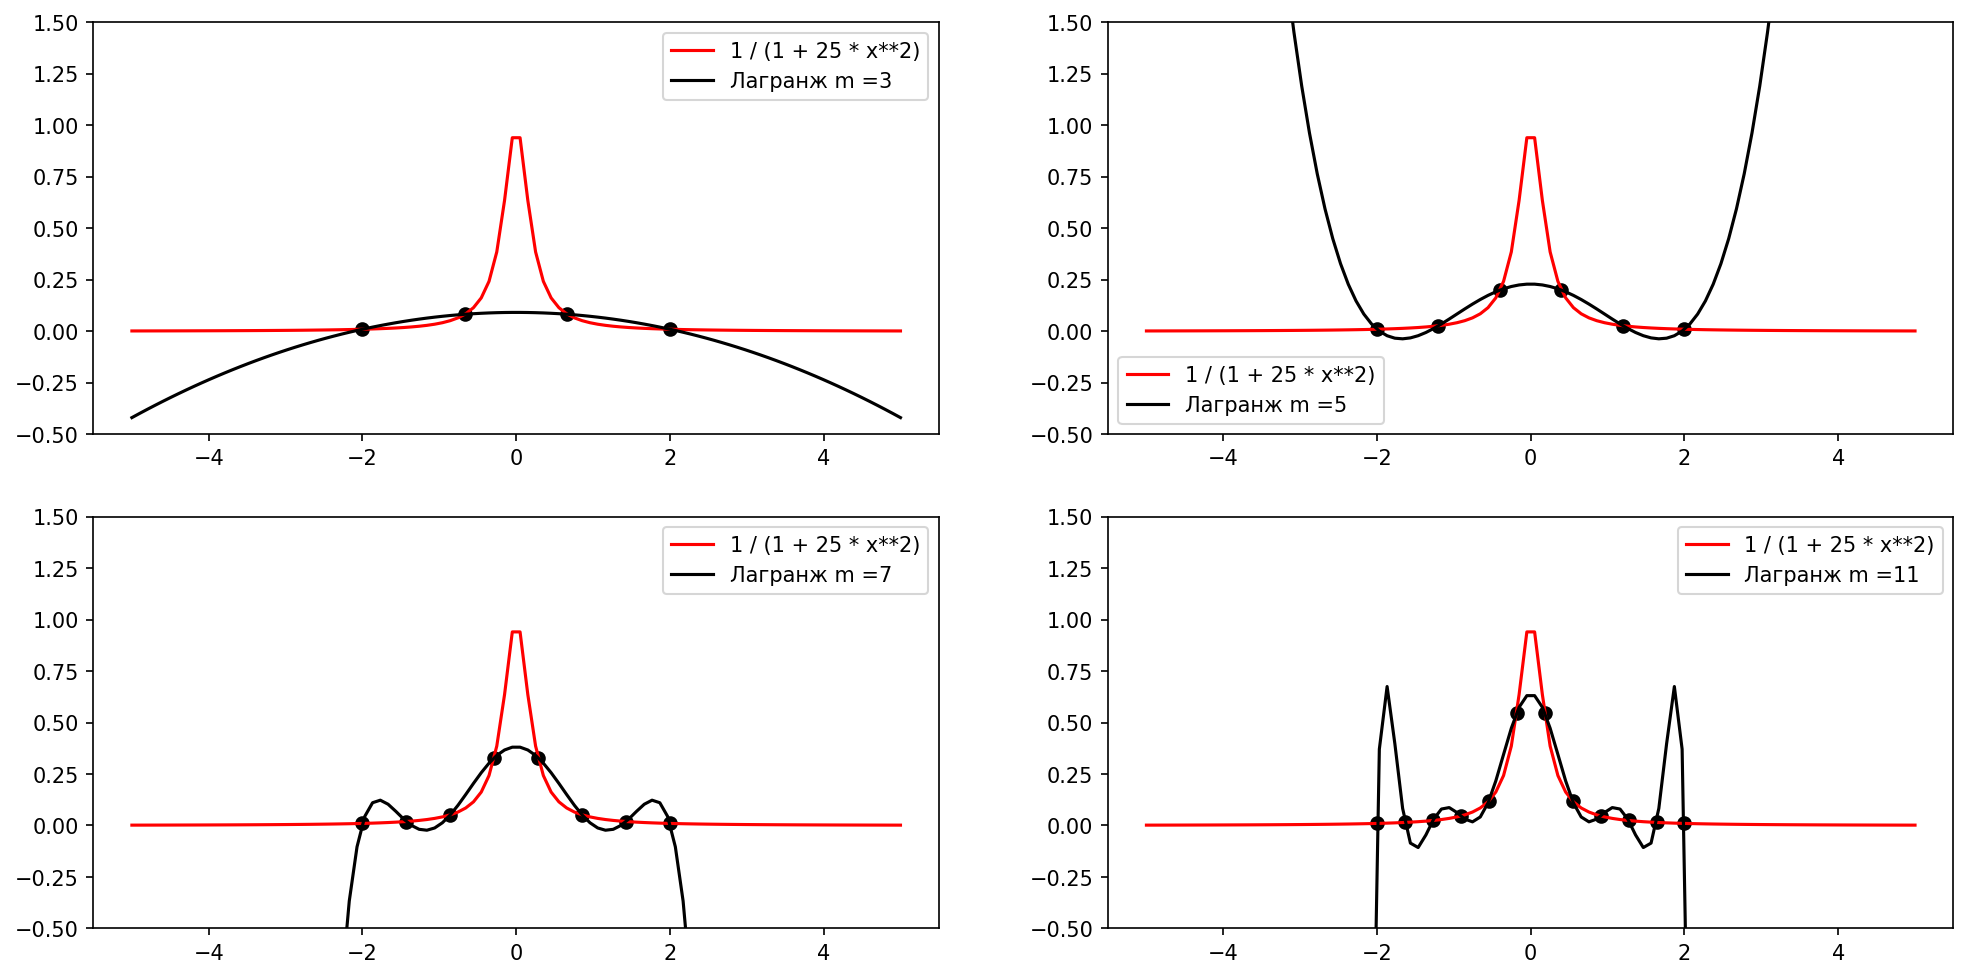

In [15]:
dots = [4, 6, 8, 12]
fig, axs = plt.subplots(2,2, figsize=(16, 8), dpi=150)

x0 = np.linspace(-5, 5, 100)

for i in range(4):
    x = np.linspace(-2, 2, dots[i])
    y = 1 / (1 + 25 * x**2)
    L = sp.interpolate.lagrange(x, y)
    
    ax = axs.flatten()[i]
    ax.scatter(x, y, color="k")
    ax.plot(x0,  1/(1+25*x0**2), label='1 / (1 + 25 * x**2)', color="r")
    ax.plot(x0, L(x0), "-", label="Лагранж m ="+str(dots[i]-1), color="k")
    ax.legend()
    ax.set_ylim(-0.5, 1.5)
    
plt.show()

Допишите функцию, которая возвращает узлы Чебышева. 

In [16]:
def cheb_nodes(n, a=-1, b=1):
    nodes = sp.special.roots_chebyt(n)[0]
    return nodes*(b-a)/2 +(a+b)/2
    raise NotImplementedError()

In [19]:
nodes_11 = cheb_nodes(11)
nodes_11 = np.asarray(nodes_11)
assert (nodes_11[1:] > nodes_11[:-1]).all()

from scipy.special import roots_chebyt
nodes, weights = roots_chebyt(5) 

assert_allclose(cheb_nodes(5),
                nodes, atol=1e-14)

assert_allclose(cheb_nodes(5, a=-1, b=3),
                nodes*2 + 1, atol=1e-14)

Повторите интерполяцию Лагранжа функции Рунге с помощью узлов Чебышева. Постройте интерполянты.
Также постройте интерполяцию кубическим сплайном тех же данных (`scipy.interpolate.CubicSpline`).
Сравните величину явления Рунге для равномерной сетки и сетки Чебышева. Демонстрирует ли интерполяция сплайнами феномен Рунге?


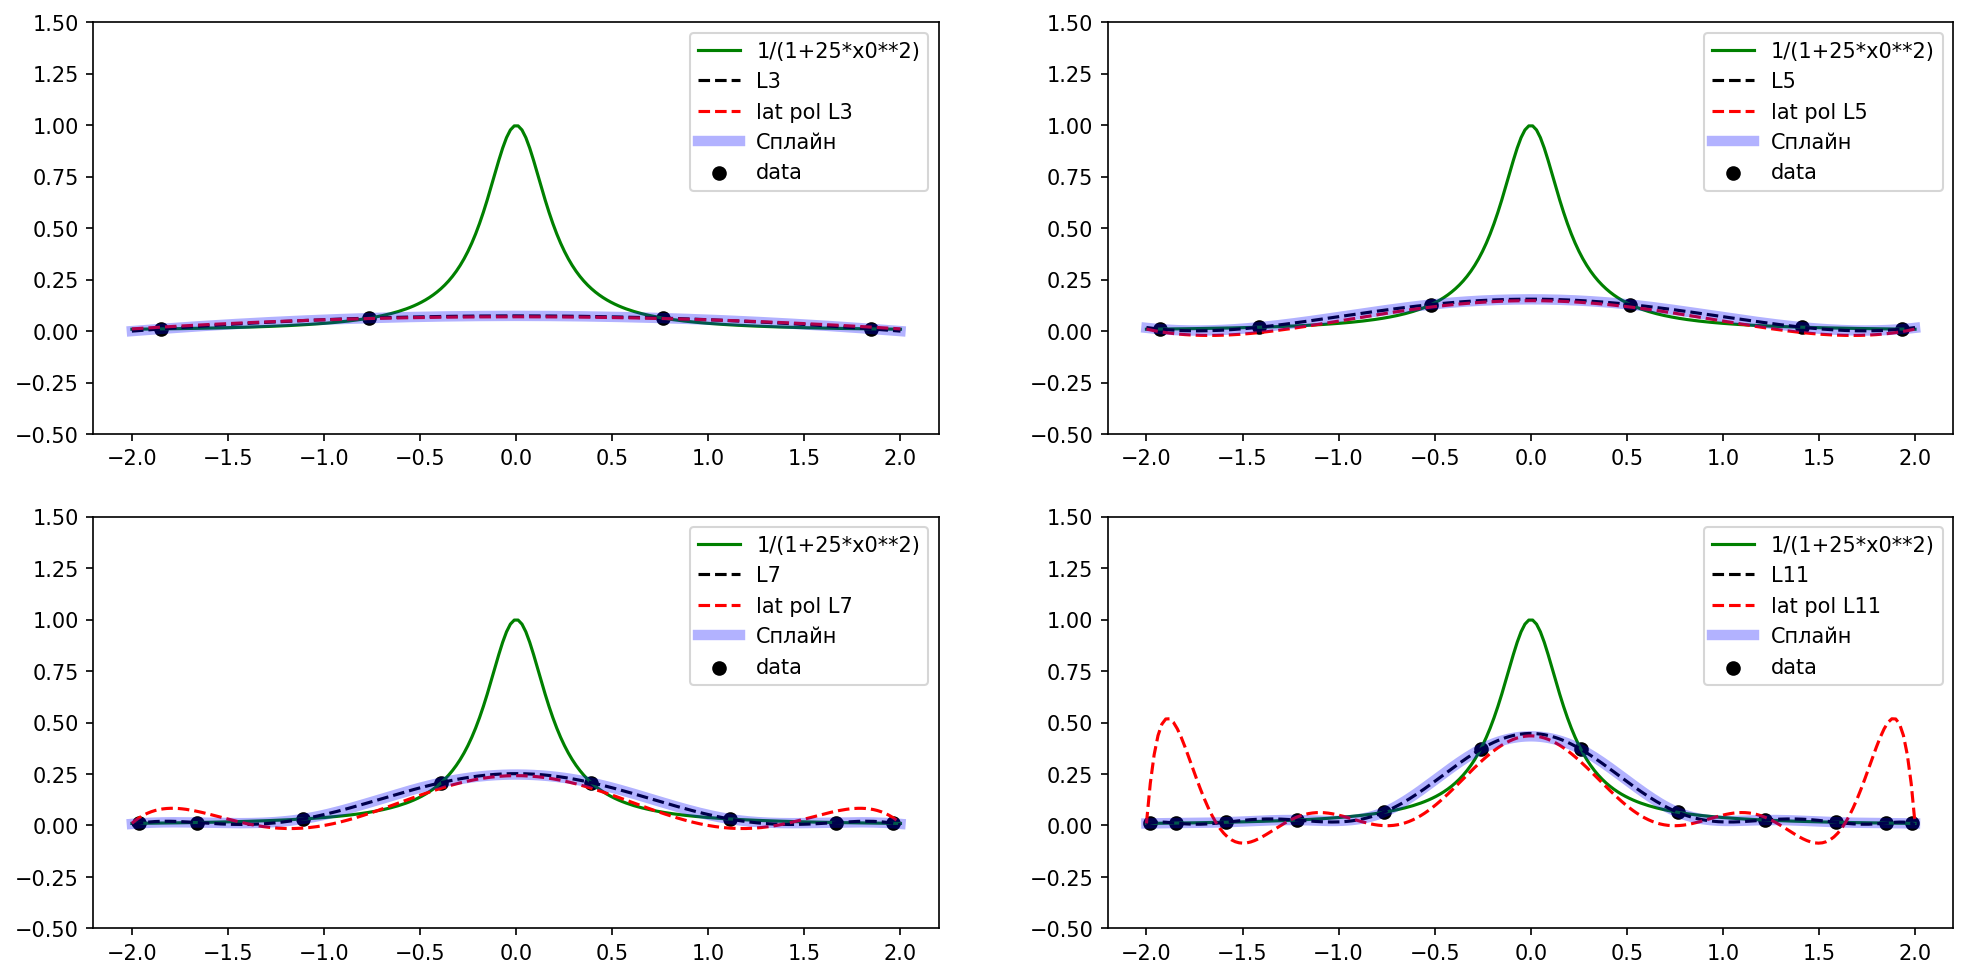

In [23]:
dots = [4, 6, 8, 12]
fig, axs = plt.subplots(2,2, figsize=(16, 8), dpi=150)

x0 = np.linspace(-2, 2, 200)

for i in range(4):
    x = cheb_nodes(dots[i], -2, 2)
    x_lat = np.linspace(-2, 2, dots[i])
    y = 1 / (1 + 25 * x**2)
    L = sp.interpolate.lagrange(x, y)
    L_lat = sp.interpolate.lagrange(x_lat, y)
    S = sp.interpolate.CubicSpline(x, y)
    
    ax = axs.flatten()[i]
    ax.scatter(x, y, color="k", label='data')
    ax.plot(x0,  1/(1+25*x0**2), label='1/(1+25*x0**2)', color="g")
    ax.plot(x0, L(x0), "--", label="L"+str(dots[i]-1), color="k")
    ax.plot(x0, L_lat(x0), "--", label="lat pol L"+str(dots[i]-1), color="r")
    ax.plot(x0, S(x0), label='Сплайн', color="b", alpha=0.3, linewidth=5)
    ax.legend()
    ax.set_ylim(-0.5, 1.5)
    
plt.show()

Другим известным трудным тестом для интерполяции является следующая периодическая функция:

$u(x)=\frac{\sqrt{\varepsilon(2+\varepsilon)}}{2 \pi(1+\varepsilon-\cos x)}, \quad-\pi \leq x \leq \pi, \quad \varepsilon=0.21  $

Проведите аналогичные вычисления и постройте графики для неё.

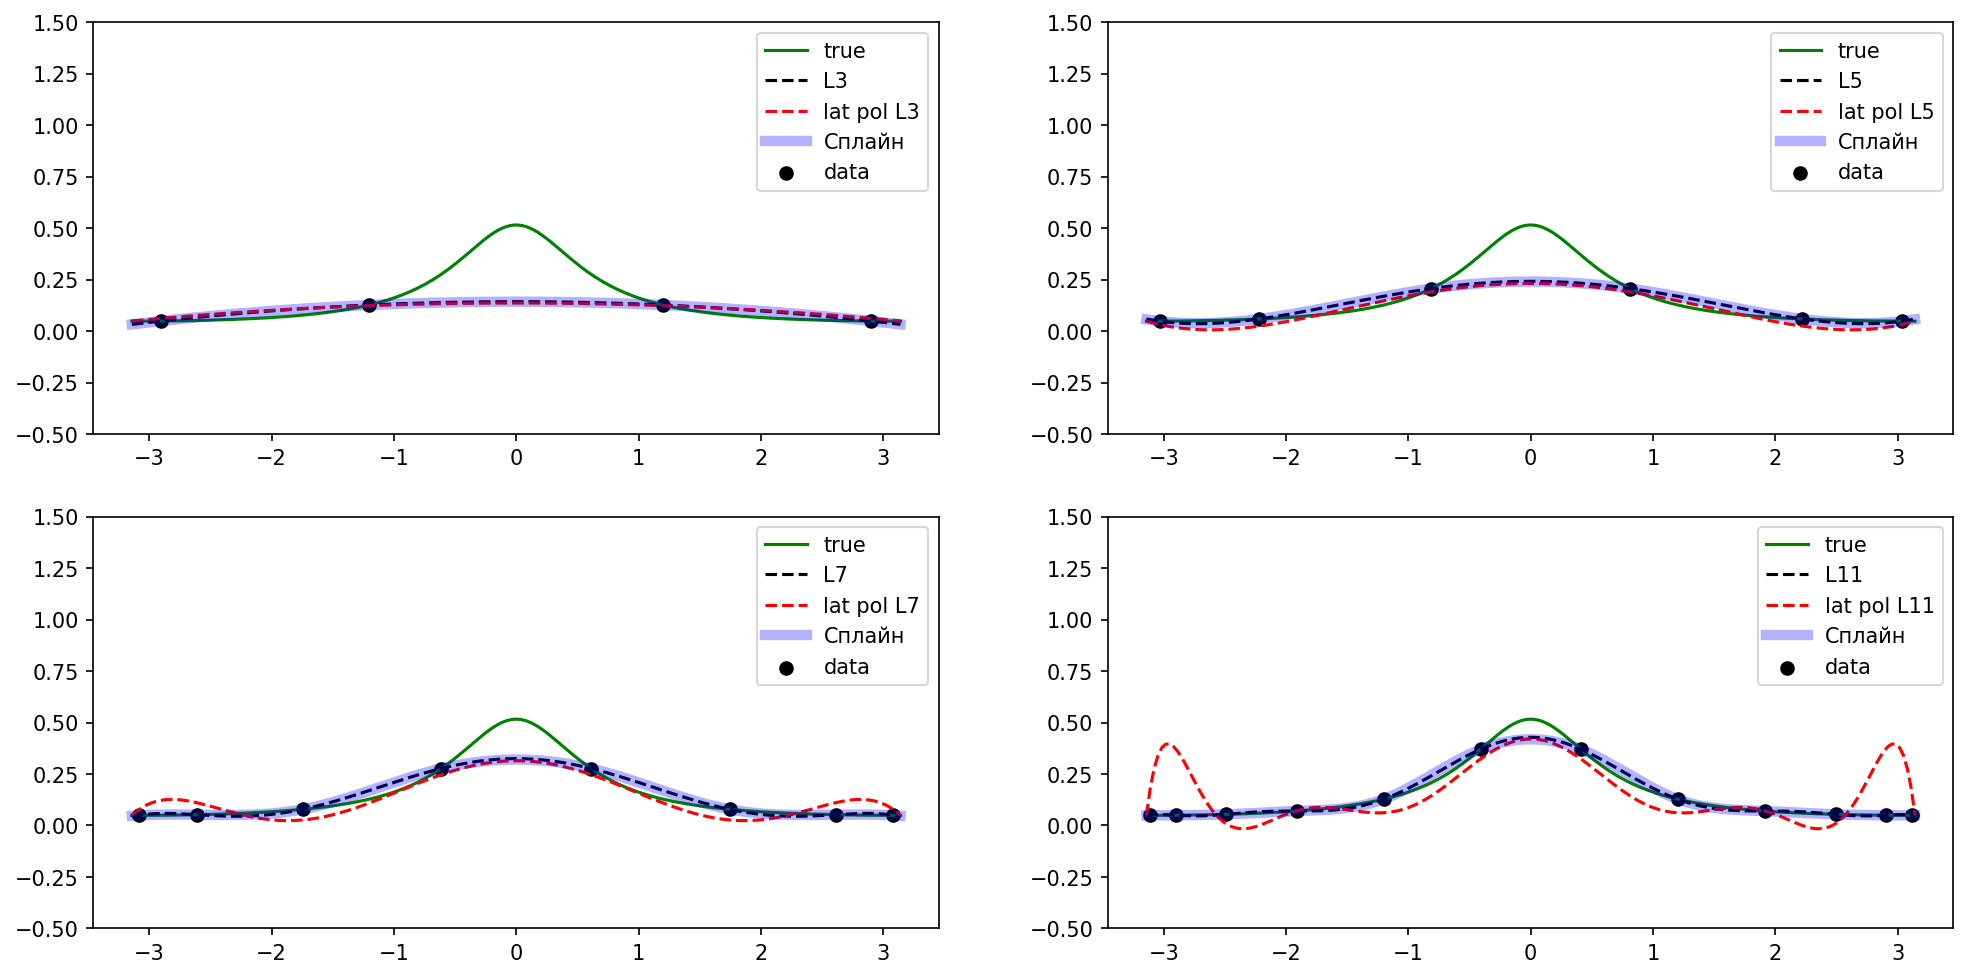

In [24]:
eps = 0.21
f = lambda x: np.sqrt(eps * (2 + eps)) / (2 * np.pi) / (1 + eps - np.cos(x))
dots = [4, 6, 8, 12]
fig, axs = plt.subplots(2,2, figsize=(16, 8), dpi=150)

x0 = np.linspace(-np.pi, np.pi, 200)

for i in range(4):
    x = cheb_nodes(dots[i], -np.pi, np.pi)
    x_lat = np.linspace(-np.pi, np.pi, dots[i])
    y = f(x)
    L = sp.interpolate.lagrange(x, y)
    L_lat = sp.interpolate.lagrange(x_lat, y)
    S = sp.interpolate.CubicSpline(x, y)
    
    ax = axs.flatten()[i]
    ax.scatter(x, y, color="k", label='data')
    ax.plot(x0,  f(x0), label='true', color="g")
    ax.plot(x0, L(x0), "--", label="L"+str(dots[i]-1), color="k")
    ax.plot(x0, L_lat(x0), "--", label="lat pol L"+str(dots[i]-1), color="r")
    ax.plot(x0, S(x0), label='Сплайн', color="b", alpha=0.3, linewidth=5)
    ax.legend()
    ax.set_ylim(-0.5, 1.5)
    
plt.show()

Постройте интерполяцию функций

$$
y_{1}(x)=\sin (6 x)+\sin \left(60 e^{x}\right), y_{2}(x)=\frac{1}{1+1000(x+0.5)^{2}}+\frac{1}{\sqrt{1+1000(x-0.5)^{2}}}
$$

на отрезке $[-1,1]$ полиномами Чебышева. Постройте зависимость ошибки приближения от количества узлов. Сколько узлов нужно удержать в каждом из этих случаев для получения достаточно точного приближения?

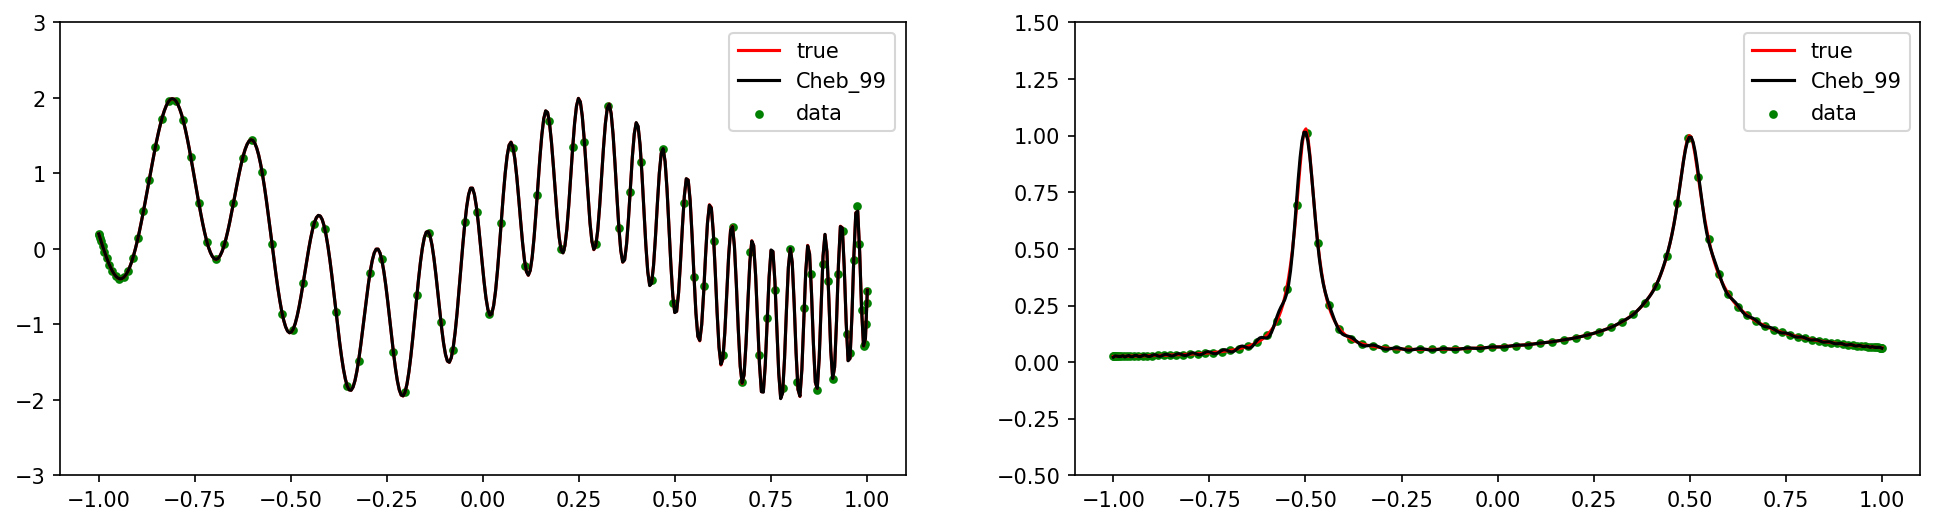

In [29]:
dots = [100, 100]
f1 = lambda x: np.sin(6 * x) + np.sin(60 * np.exp(x))
f2 = lambda x: 1 / (1 + 1000 * (x + 0.5)**2) + 1 / np.sqrt(1 + 1000 * (x-0.5)**2)

fig, axs = plt.subplots(1,2, figsize=(16, 4), dpi=150)
x0 = np.linspace(-1, 1, 400)
for i in range(2):
    f = [f1, f2][i]
    x = cheb_nodes(dots[i], -1, 1)
    
    CHF = np.polynomial.chebyshev.Chebyshev.interpolate(f, dots[i])
    
    ax = axs.flatten()[i]
    ax.scatter(x, f(x), color="g", label='data',s=10)
    ax.plot(x0,  f(x0), label='true', color="r")
    ax.plot(x0, CHF(x0), "-", label="Cheb_"+str(dots[i]-1), color="k")
    ax.legend()

axs[0].set_ylim(-3, 3)
axs[1].set_ylim(-0.5, 1.5)
    
plt.show()

In [30]:
#Норма C[-1, 1]
def GetErr(f, N):
    x0 = np.linspace(-1, 1, 400)
    CHF = np.polynomial.chebyshev.Chebyshev.interpolate(f, N)
    return max(np.abs(f(x0)-CHF(x0)))

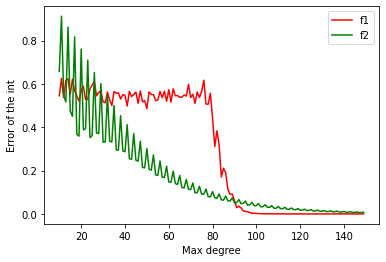

In [34]:
f1 = lambda x: np.sin(6 * x) + np.sin(60 * np.exp(x))
f2 = lambda x: 1 / (1 + 1000 * (x + 0.5)**2) + 1 / np.sqrt(1 + 1000 * (x-0.5)**2)

ns = range(10, 150);

err1 = [GetErr(f1, n)/4 for n in ns] # отнормируем для удобства сравнения
err2 = [GetErr(f2, n) for n in ns]

plt.plot(ns, err1, color="r", label="f1")
plt.plot(ns, err2, color="g", label="f2")
plt.xlabel("Max degree")
plt.ylabel("Error of the int")
plt.legend()
plt.show()

Из графика достаточно степени полинома порядка 95

## Задание 4

Вектора х4 и у4 из архива дают значения некоторой функции на равномерной сетке на отрезке [-0.75, 0.75]. Используя scipy . optimize.curve_fit, постройте интерполяцию функции $y(x)$ функциями вида

$$
y_{1}(x)=p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}+p_{4} x^{4}+p_{5} x^{5}, y_{2}(x)=\frac{p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}}{1+q_{1} x+q_{2} x^{2}}
$$


Какая из этих формул лучше описывает $y(x)$ на заданном интервале? Постройте график экстраполяции $y(x)$ за пределы исходных данных. Можете ли вы угадать аналитическое выражение для $y(x) ?$

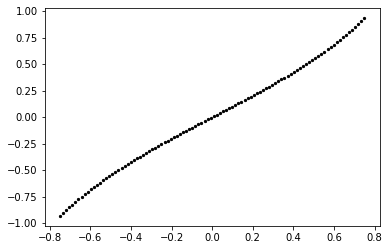

In [35]:
df = np.load("C2_data_7_1.npz");
x4 = df["x4"]
y4 = df["y4"]
plt.scatter(x4, y4, s=5, color="k") 
plt.show()

In [36]:
from scipy.optimize import curve_fit

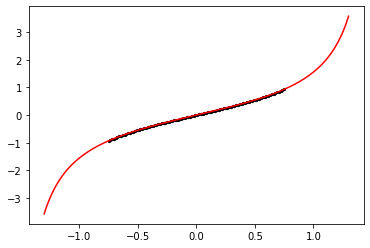

In [37]:
def f1(x, p0, p1, p2, p3, p4, p5):
    return p0 + p1 * x + p2 * x**2 + p3 * x**3 + p4 * x**4 + p5 * x**5

def f2(x, p0, p1, p2, p3, q1, q2):
    return (p0 + p1 * x + p2 * x**2 + p3 * x**3) / (1 + q1 * x + q2 * x**2)

popt1, *_ = curve_fit(f1, x4, y4)
popt2, *_ = curve_fit(f2, x4, y4)

x0 = np.linspace(-1.3, 1.3, 200)
plt.scatter(x4, y4, s=5, color="k") 
plt.plot(x0, f2(x0, *popt2), color="r", label="f1") 
plt.show()

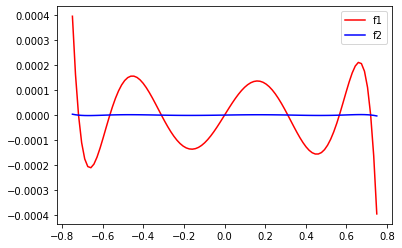

In [38]:
plt.plot(x4, f1(x4, *popt1)-y4, color="r", label="f1") 
plt.plot(x4, f2(x4, *popt2)-y4, color="b", label="f2") 
plt.legend()
plt.show()